In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv(r'F:\machine learning and deep learning\datasets\bme280sensordata\pandas_simple.csv')

In [3]:
data.head()

,Date,Temperature,Humidity,Pressure,class
0,5/21/2019 4:43,79.705149,29.763173,971.557684,1
1,5/21/2019 4:43,79.611960,29.644341,971.594328,1
2,5/21/2019 4:43,79.602869,29.584354,971.582935,1
3,5/21/2019 4:43,79.600596,29.668567,971.561229,1
4,5/21/2019 4:43,79.589232,29.668746,971.584034,1


In [4]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data.head()

,Date,Temperature,Humidity,Pressure,class
0,2019-05-21 04:43:00,79.705149,29.763173,971.557684,1
1,2019-05-21 04:43:00,79.611960,29.644341,971.594328,1
2,2019-05-21 04:43:00,79.602869,29.584354,971.582935,1
3,2019-05-21 04:43:00,79.600596,29.668567,971.561229,1
4,2019-05-21 04:43:00,79.589232,29.668746,971.584034,1


In [5]:
data_new = data.set_index('Date')

In [6]:
data_new.head()

,Temperature,Humidity,Pressure,class
Date,,,,
2019-05-21 04:43:00,79.705149,29.763173,971.557684,1
2019-05-21 04:43:00,79.611960,29.644341,971.594328,1
2019-05-21 04:43:00,79.602869,29.584354,971.582935,1
2019-05-21 04:43:00,79.600596,29.668567,971.561229,1
2019-05-21 04:43:00,79.589232,29.668746,971.584034,1


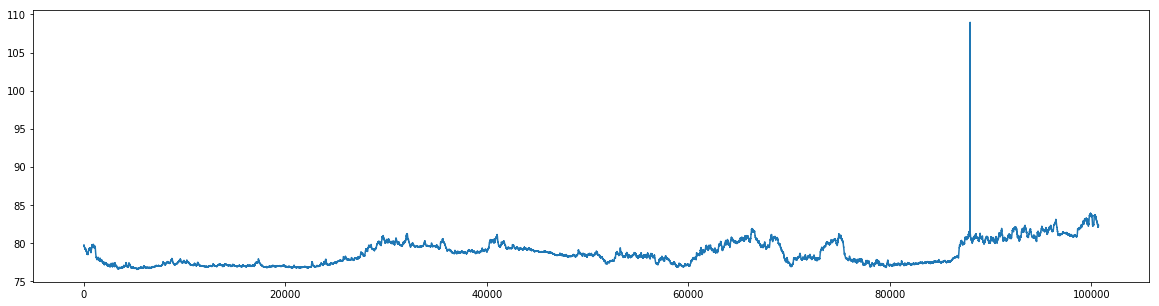

In [7]:
fig = plt.figure(figsize=(20,5))
plt.plot(data.Temperature);

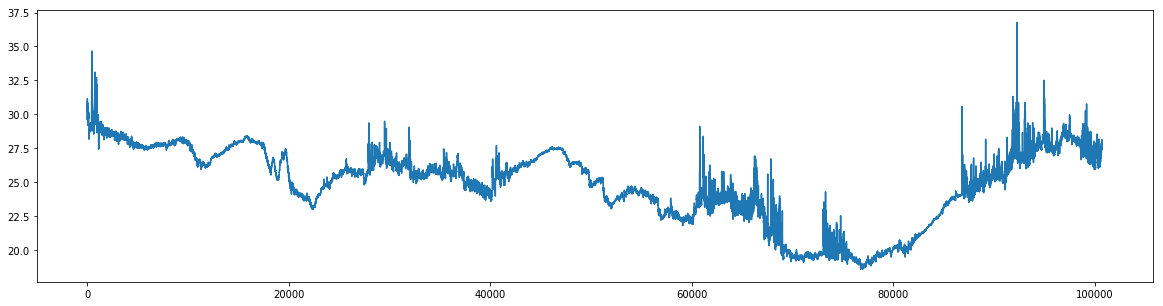

In [8]:
fig = plt.figure(figsize=(20,5))
plt.plot(data.Humidity);

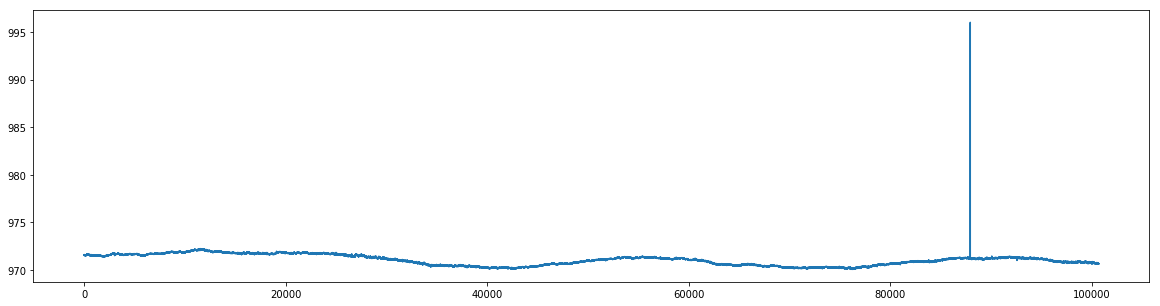

In [9]:
fig = plt.figure(figsize=(20,5))
plt.plot(data.Pressure);

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100700 entries, 0 to 100699
Data columns (total 5 columns):
Date           100700 non-null datetime64[ns]
Temperature    100700 non-null float64
Humidity       100700 non-null float64
Pressure       100700 non-null float64
class          100700 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 3.8 MB


In [11]:
data.columns

Index(['Date', 'Temperature', 'Humidity', 'Pressure', 'class'], dtype='object')

In [12]:
data['class'].unique()

array([1, 0], dtype=int64)

f:\great_learnings\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


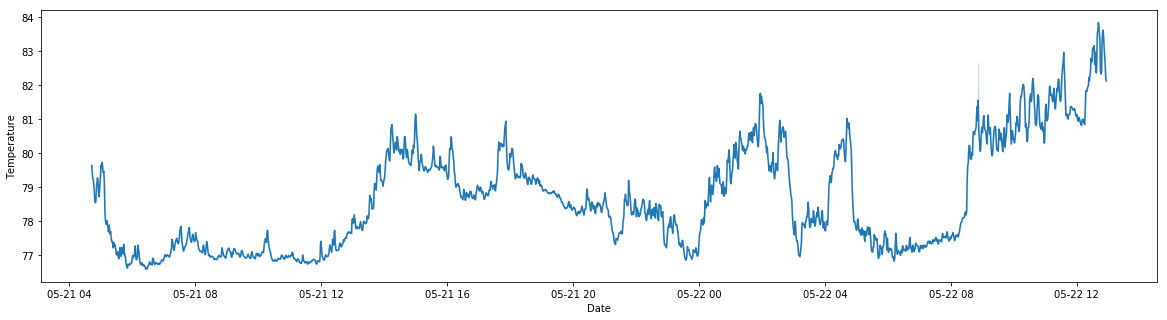

In [13]:
fig = plt.figure(figsize=(20,5))
sns.lineplot(x='Date',y='Temperature',data=data);

In [14]:
data_master = data.groupby('Date',as_index=False).mean()
data_master.head()

,Date,Temperature,Humidity,Pressure,class
0,2019-05-21 04:43:00,79.646649,30.344779,971.583783,1.0
1,2019-05-21 04:44:00,79.436577,29.744662,971.569024,1.0
2,2019-05-21 04:45:00,79.248606,29.740329,971.566913,1.0
3,2019-05-21 04:46:00,79.229723,29.264788,971.562597,1.0
4,2019-05-21 04:47:00,79.029246,28.626295,971.557560,1.0


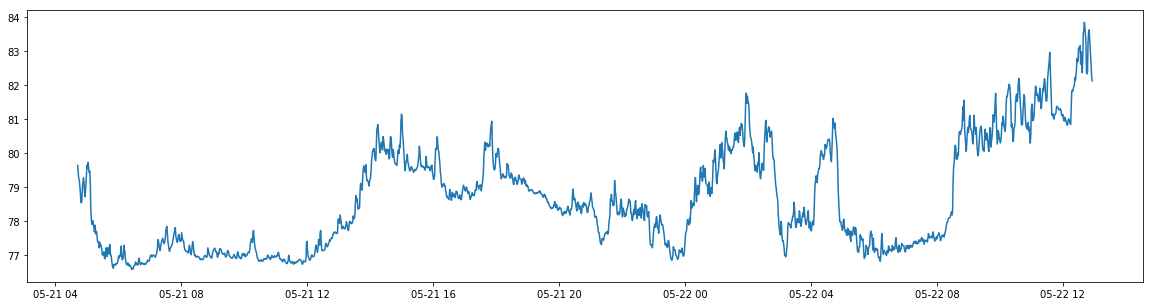

In [15]:
fig = plt.figure(figsize=(20,5))
plt.plot(data.groupby('Date').mean().Temperature);

In [16]:
y = data_new['class'].astype('category')
x = data_new.drop('class',axis=1)

In [17]:
data_master.corr()

,Temperature,Humidity,Pressure,class
Temperature,1.000000,0.157680,-0.414016,0.806201
Humidity,0.157680,1.000000,0.540445,0.126258
Pressure,-0.414016,0.540445,1.000000,-0.500007
class,0.806201,0.126258,-0.500007,1.000000


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [19]:
col = x.columns

In [20]:
col

Index(['Temperature', 'Humidity', 'Pressure'], dtype='object')

In [22]:
import warnings
warnings.filterwarnings("ignore")
acc = []
conmtr = []
clf = LogisticRegression()
for i in col:
    X = x.loc[:,:i]
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    conmtr.append(confusion_matrix(y_test,y_pred))
    acc.append(round(accuracy_score(y_test,y_pred)*100,2))

for i in col:
    X = np.array(x.loc[:,i]).reshape(-1,1)
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    conmtr.append(confusion_matrix(y_test,y_pred))
    acc.append(round(accuracy_score(y_test,y_pred)*100,2))

In [23]:
acc

[97.47, 97.26, 99.64, 97.47, 61.54, 57.3]

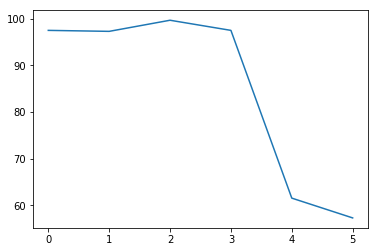

In [24]:
plt.plot(acc);

In [25]:
conmtr

[array([[12900,     0],
        [  763, 16547]], dtype=int64), array([[12900,     0],
        [  827, 16483]], dtype=int64), array([[12877,    23],
        [   86, 17224]], dtype=int64), array([[12900,     0],
        [  763, 16547]], dtype=int64), array([[ 3046,  9854],
        [ 1764, 15546]], dtype=int64), array([[    0, 12900],
        [    0, 17310]], dtype=int64)]